In [1]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn import metrics
random.seed(123)
%matplotlib inline
mnist = load_digits()
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

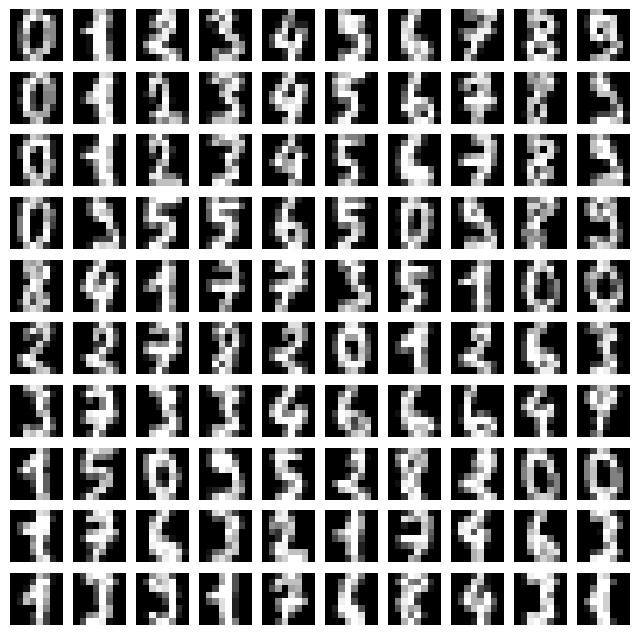

In [3]:

# Visualizing the first 100 digits
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.images[i], cmap='gray')
    ax.axis('off')



In [5]:
# Prepare the data
data = pd.DataFrame(mnist.data)
target = pd.DataFrame(mnist.target)


In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
target

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [11]:

# Split the data
train_x = data.iloc[0:1500,]
train_y = target.iloc[0:1500,]
test_x = data.iloc[1501:1797,]
test_y = target.iloc[1501:1797,]



In [13]:
# Binarize the target labels for multiclass ROC-AUC computation
test_y_binarized = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
test_y_binarized

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [29]:
 #Defining a reusable function to evaluate model performance
def eval_result(model, y_train, y_predtrain, y_test, y_predtest,test_y_binarized):
    #calculating the training accuracy
    train_accuracy = metrics.accuracy_score(y_train, y_predtrain)
    print(f'Training data accuracy: {train_accuracy}')

    #calculating the testing accuracy
    test_accuracy = accuracy_score(y_test, y_predtest)
    print(f'Testing data accuracy: {test_accuracy}')

    # Use roc_auc_score with average='weighted' for multiclass classification
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(train_x), multi_class='ovr', average='weighted')
    print(f'Area under the ROC curve for training data: {train_roc_auc}')

    test_roc_auc = roc_auc_score(y_test, model.predict_proba(test_x), multi_class='ovr', average='weighted')
    print(f'Area under the ROC curve for testing data: {test_roc_auc}')

    print(classification_report(y_test, y_predtest, digits=5))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, test_x, test_y, cmap=plt.cm.pink)
    plt.show()

    '''# ROC Curve
    # ROC Curve for each class
    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(10):  # for each class
        RocCurveDisplay.from_estimator(model, test_x, test_y_binarized[:, i], ax=ax, name=f"Class {i}")
    plt.show()'''

    # ROC Curve for each class
    fig, ax = plt.subplots(figsize=(10, 8))
    for i in range(10):  # for each class
        RocCurveDisplay.from_predictions(test_y_binarized[:, i], model.predict_proba(test_x)[:, i], ax=ax, name=f"Class {i}")
    plt.show()




In [31]:
# Running the model
def run_model(model):
    t0 = time.time()
    model.fit(train_x, train_y.values.ravel())
    time_taken = time.time() - t0
    print(f'Time taken: {time_taken}')



In [33]:
 #Create and run Logistic Regression model
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=400)
run_model(modellr)



Time taken: 0.21603012084960938


In [35]:
# Make predictions
y_hat_train = modellr.predict(train_x)
y_hat_test = modellr.predict(test_x)



Training data accuracy: 1.0
Testing data accuracy: 0.9155405405405406
Area under the ROC curve for training data: 1.0
Area under the ROC curve for testing data: 0.9912903600040051
              precision    recall  f1-score   support

           0    1.00000   0.92593   0.96154        27
           1    0.78947   1.00000   0.88235        30
           2    1.00000   1.00000   1.00000        27
           3    0.95238   0.66667   0.78431        30
           4    0.96774   0.90909   0.93750        33
           5    0.93333   0.93333   0.93333        30
           6    0.96667   0.96667   0.96667        30
           7    0.93333   0.93333   0.93333        30
           8    0.78788   0.92857   0.85246        28
           9    0.90323   0.90323   0.90323        31

    accuracy                        0.91554       296
   macro avg    0.92340   0.91668   0.91547       296
weighted avg    0.92315   0.91554   0.91476       296



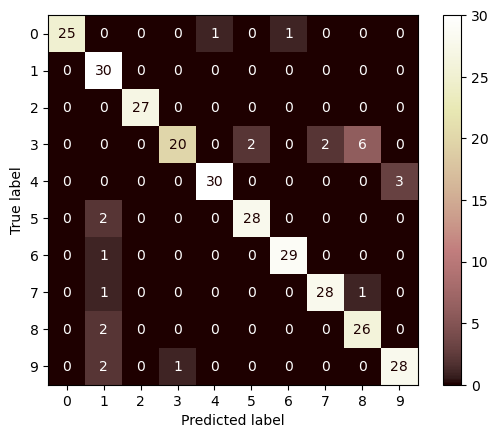

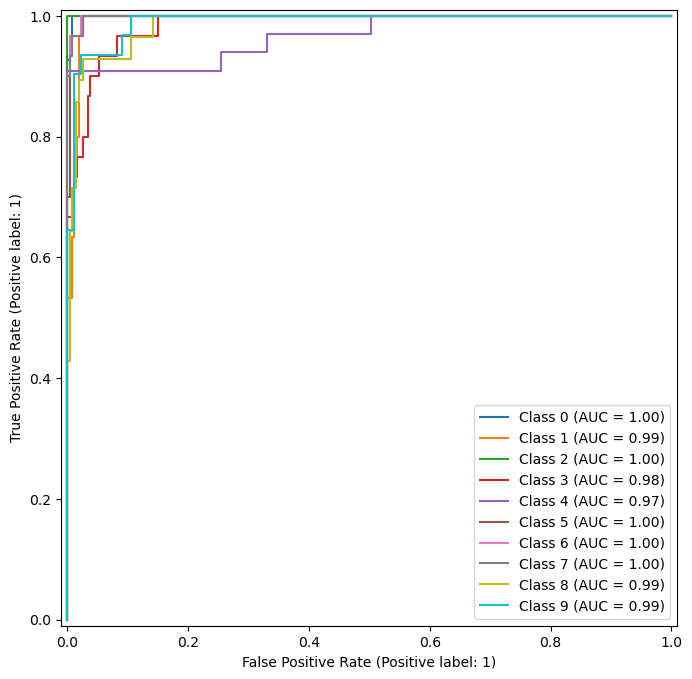

In [37]:
# Evaluate results, passing in the binarized test_y
eval_result(modellr, train_y, y_hat_train, test_y, y_hat_test, test_y_binarized)

Time taken: 0.21352124214172363
Training data accuracy: 1.0
Testing data accuracy: 0.9222972972972973
Area under the ROC curve for training data: 1.0
Area under the ROC curve for testing data: 0.9957977692129372
              precision    recall  f1-score   support

           0    0.96296   0.96296   0.96296        27
           1    0.85714   1.00000   0.92308        30
           2    1.00000   0.96296   0.98113        27
           3    1.00000   0.70000   0.82353        30
           4    0.93750   0.90909   0.92308        33
           5    0.85714   1.00000   0.92308        30
           6    1.00000   0.93333   0.96552        30
           7    0.90909   1.00000   0.95238        30
           8    0.77419   0.85714   0.81356        28
           9    1.00000   0.90323   0.94915        31

    accuracy                        0.92230       296
   macro avg    0.92980   0.92287   0.92175       296
weighted avg    0.93012   0.92230   0.92156       296



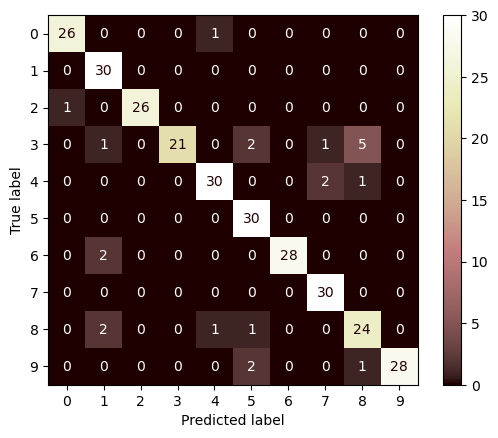

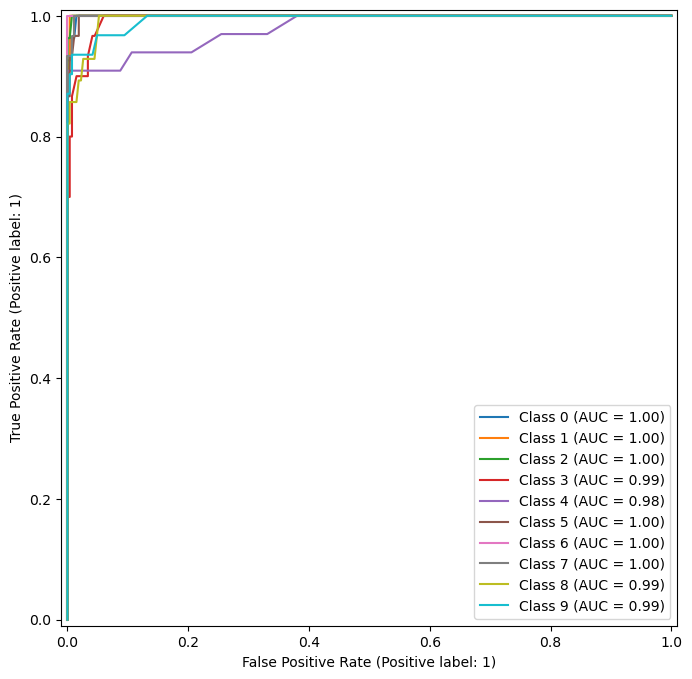

In [39]:
# Create and run Random Forest model
model_rf = RandomForestClassifier(random_state=0, n_estimators=100)
run_model(model_rf)

# Make predictions
y_hat_train = model_rf.predict(train_x)
y_hat_test = model_rf.predict(test_x)

# Evaluate results, passing in the binarized test_y
eval_result(model_rf, train_y, y_hat_train, test_y, y_hat_test, test_y_binarized)

Time taken: 0.028990983963012695

Decision Tree Results:
Training data accuracy: 1.0
Testing data accuracy: 0.7668918918918919
Area under the ROC curve for training data: 1.0
Area under the ROC curve for testing data: 0.870578601723002
              precision    recall  f1-score   support

           0    0.92857   0.96296   0.94545        27
           1    0.74074   0.66667   0.70175        30
           2    0.76923   0.74074   0.75472        27
           3    0.60870   0.46667   0.52830        30
           4    0.88235   0.90909   0.89552        33
           5    0.84375   0.90000   0.87097        30
           6    0.92593   0.83333   0.87719        30
           7    0.70270   0.86667   0.77612        30
           8    0.51429   0.64286   0.57143        28
           9    0.77778   0.67742   0.72414        31

    accuracy                        0.76689       296
   macro avg    0.76940   0.76664   0.76456       296
weighted avg    0.77069   0.76689   0.76532       296



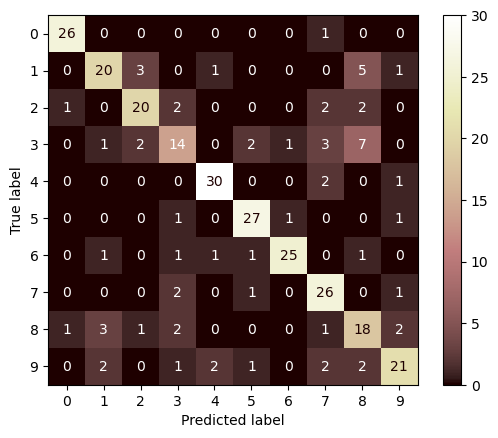

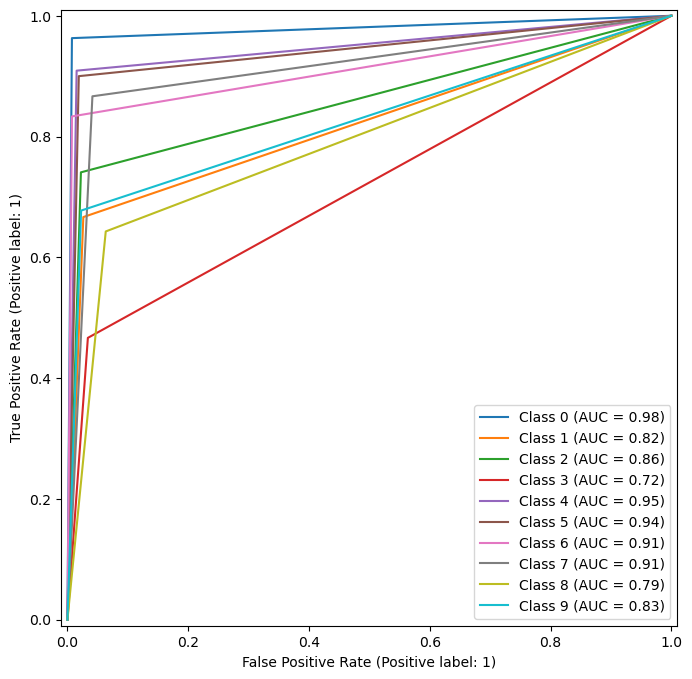

In [41]:
# Create and run Decision Tree model
model_dt = DecisionTreeClassifier(random_state=0)
run_model(model_dt)

# Make predictions for Decision Tree
y_hat_train_dt = model_dt.predict(train_x)
y_hat_test_dt = model_dt.predict(test_x)

# Evaluate results for Decision Tree
print("\nDecision Tree Results:")
eval_result(model_dt, train_y, y_hat_train_dt, test_y, y_hat_test_dt, test_y_binarized)